# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# WeatherPY Trends:

For the Latitude vs. Temperature Plot, the scatterplot shows the temperature peaks between 38° to 48° latitude and then drops back down as the latitude continues to increase.

For Northern Hemisphere - Max Temp vs. Latitude Linear Regression, there is negative correlation as latitude increases max temperatures continue to decline. 

For Southern Hemisphere - Max Temp vs. Latitude Linear Regression, there is a positive correlation as latitude increases max temperature continues to increases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(queryURL + city).json()

In [4]:
# set up empty lists for needed characters
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
processingRecord = 0
setNumber = 1

#start processing record at 1
processingRecord = 1
setNumber = 1

print("Beginning Data Retrieval")
print("-------------------------")

# loop through each city
for city in cities:
    
#Exception handling
    try:
        response = requests.get(queryURL + city).json()
        city_id.append(response['id'])
        city_name.append(response['name']) 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cityResponse = response['name']   
        if processingRecord > 49:
            processingRecord = 0
            setNumber = setNumber + 1
    
        else:
            processingRecord = processingRecord + 1

        print(f"Processing Record {processingRecord} of {setNumber} | {cityResponse}")
        
    except:
        print("city not found. Skipping ...")
    continue
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
city not found. Skipping ...
Processing Record 2 of 1 | Chokurdakh
Processing Record 3 of 1 | Dolores
Processing Record 4 of 1 | Ushuaia
Processing Record 5 of 1 | Jamestown
Processing Record 6 of 1 | Oussouye
Processing Record 7 of 1 | Qaanaaq
Processing Record 8 of 1 | Punta Arenas
city not found. Skipping ...
Processing Record 9 of 1 | Kavaratti
Processing Record 10 of 1 | Pandan
Processing Record 11 of 1 | Puerto Cabezas
Processing Record 12 of 1 | Kaitangata
Processing Record 13 of 1 | Karoi
Processing Record 14 of 1 | Albany
Processing Record 15 of 1 | Biltine
Processing Record 16 of 1 | Ancud
Processing Record 17 of 1 | East London
Processing Record 18 of 1 | Hermanus
Processing Record 19 of 1 | Shelburne
Processing Record 20 of 1 | Fukuechō
Processing Record 21 of 1 | Port Alfred
Processing Record 22 of 1 | Etchoropo
Processing Record 23 of 1 | Cheremushskiy
Processing Record 24 of 1 | Chui
Processing Record 25 of 1 | Miranda
P

Processing Record 5 of 5 | Atar
city not found. Skipping ...
Processing Record 6 of 5 | Vestmannaeyjar
Processing Record 7 of 5 | Arraial do Cabo
city not found. Skipping ...
Processing Record 8 of 5 | Mandalgovi
city not found. Skipping ...
Processing Record 9 of 5 | Doaba
Processing Record 10 of 5 | Puerto Escondido
Processing Record 11 of 5 | Tarija
Processing Record 12 of 5 | Urk
Processing Record 13 of 5 | Maţāy
city not found. Skipping ...
Processing Record 14 of 5 | George
Processing Record 15 of 5 | Chapada dos Guimarães
city not found. Skipping ...
Processing Record 16 of 5 | Lukulu
Processing Record 17 of 5 | Mayumba
city not found. Skipping ...
Processing Record 18 of 5 | Kahului
Processing Record 19 of 5 | Mayo
Processing Record 20 of 5 | Rome
Processing Record 21 of 5 | Neuquén
city not found. Skipping ...
Processing Record 22 of 5 | Dudinka
Processing Record 23 of 5 | Buala
Processing Record 24 of 5 | Slave Lake
Processing Record 25 of 5 | Senneterre
Processing Record 26 

Processing Record 8 of 9 | Palana
Processing Record 9 of 9 | Taltal
Processing Record 10 of 9 | Kuopio
Processing Record 11 of 9 | Vero Beach
Processing Record 12 of 9 | Aswān
Processing Record 13 of 9 | Imphal
city not found. Skipping ...
Processing Record 14 of 9 | Broome
Processing Record 15 of 9 | Guiratinga
Processing Record 16 of 9 | Yangi Marg`ilon
Processing Record 17 of 9 | Krasnovishersk
Processing Record 18 of 9 | Abnūb
city not found. Skipping ...
Processing Record 19 of 9 | Sangar
Processing Record 20 of 9 | Skała
Processing Record 21 of 9 | Zonguldak
Processing Record 22 of 9 | Dalby
Processing Record 23 of 9 | Kulhudhuffushi
city not found. Skipping ...
Processing Record 24 of 9 | Manatí
Processing Record 25 of 9 | Mananjary
Processing Record 26 of 9 | Birobidzhan
Processing Record 27 of 9 | Port Macquarie
Processing Record 28 of 9 | Manicoré
Processing Record 29 of 9 | Jumla
Processing Record 30 of 9 | Olafsvik
Processing Record 31 of 9 | Barcelos
Processing Record 32 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDict = {
    "City ID":city_id, 
    "City Name":city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Date":date, 
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng, 
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
}
weatherDict = pd.DataFrame(weatherDict)
weatherDict.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2126123,Chokurdakh,40,RU,1658710728,34,70.6333,147.9167,69.31,11.30
1,3435038,Dolores,100,AR,1658710773,91,-36.3132,-57.6792,51.76,10.18
2,3833367,Ushuaia,40,AR,1658710585,64,-54.8000,-68.3000,35.26,5.75
3,5122534,Jamestown,97,US,1658710725,83,42.0970,-79.2353,74.79,5.99
4,2246901,Oussouye,73,SN,1658710773,88,12.4850,-16.5469,75.29,3.69


In [6]:
weatherDict.count()

City ID            581
City Name          581
Cloudiness         581
Country            581
Date               581
Humidity           581
Latitude           581
Longitude          581
Max Temperature    581
Wind Speed         581
dtype: int64

In [7]:
weatherDict.to_csv("output_data/weatherDict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
maxHumid = weatherDict.loc[weatherDict['Humidity'] != 100]
maxHumid.describe()

,City ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,5.740000e+02,574.000000,5.740000e+02,574.000000,574.000000,574.000000,574.000000,574.000000
mean,2.750370e+06,53.757840,1.658711e+09,71.926829,20.043480,17.300970,68.997265,7.294286
std,1.707141e+06,40.447828,7.234024e+01,20.485679,33.919481,91.334682,13.594651,4.904864
min,5.700000e+04,0.000000,1.658710e+09,1.000000,-54.800000,-175.200000,26.650000,0.000000
25%,1.513188e+06,8.000000,1.658711e+09,63.000000,-9.659775,-65.351300,58.950000,3.717500
50%,2.206884e+06,59.500000,1.658711e+09,77.000000,26.340200,23.254350,70.855000,6.070000
75%,3.799287e+06,99.000000,1.658711e+09,87.000000,49.566750,96.932125,79.997500,9.762500
max,1.072286e+07,100.000000,1.658711e+09,99.000000,78.218600,179.316700,101.880000,29.040000


In [9]:
#  Get the indices of cities that have humidity over 100%.
maxHumid.count()

City ID            574
City Name          574
Cloudiness         574
Country            574
Date               574
Humidity           574
Latitude           574
Longitude          574
Max Temperature    574
Wind Speed         574
dtype: int64

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
maxHumid.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2126123,Chokurdakh,40,RU,1658710728,34,70.6333,147.9167,69.31,11.30
1,3435038,Dolores,100,AR,1658710773,91,-36.3132,-57.6792,51.76,10.18
2,3833367,Ushuaia,40,AR,1658710585,64,-54.8000,-68.3000,35.26,5.75
3,5122534,Jamestown,97,US,1658710725,83,42.0970,-79.2353,74.79,5.99
4,2246901,Oussouye,73,SN,1658710773,88,12.4850,-16.5469,75.29,3.69


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

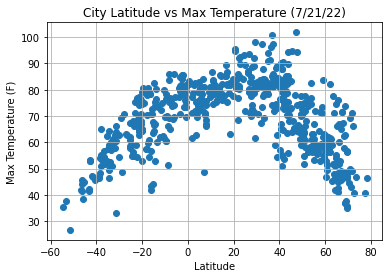

In [12]:
plt.scatter(maxHumid["Latitude"], maxHumid["Max Temperature"])
plt.title("City Latitude vs Max Temperature (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

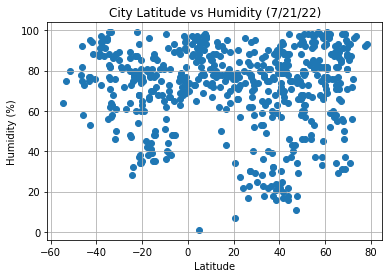

In [13]:
plt.scatter(maxHumid["Latitude"], maxHumid["Humidity"])
plt.title("City Latitude vs Humidity (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

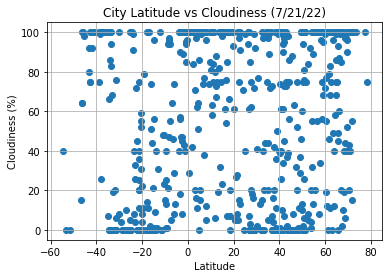

In [14]:
plt.scatter(maxHumid["Latitude"], maxHumid["Cloudiness"])
plt.title("City Latitude vs Cloudiness (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

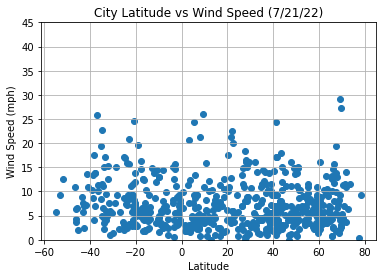

In [15]:
plt.scatter(maxHumid["Latitude"], maxHumid["Wind Speed"])
plt.title("City Latitude vs Wind Speed (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,45)
plt.grid()
plt.show()

## Linear Regression

In [16]:
north = maxHumid['Latitude'] >= 0
northernHem = maxHumid[north]
southernHem = maxHumid[~north]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.38704707946018646


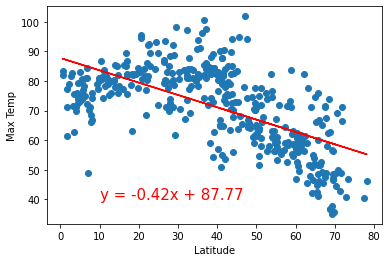

In [17]:
x_values = northernHem['Latitude']
y_values = northernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6153637469715882


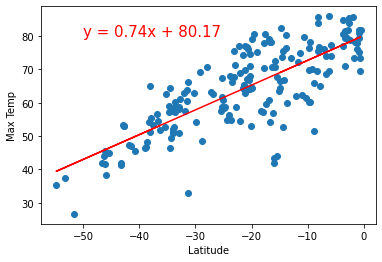

In [18]:
x_values = southernHem['Latitude']
y_values = southernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.00018750347083315816


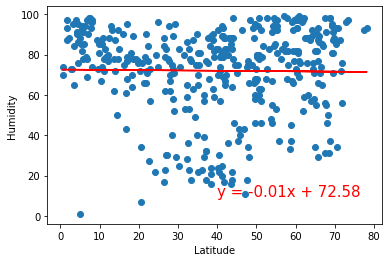

In [19]:
x_values = northernHem['Latitude']
y_values = northernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.02813129177911663


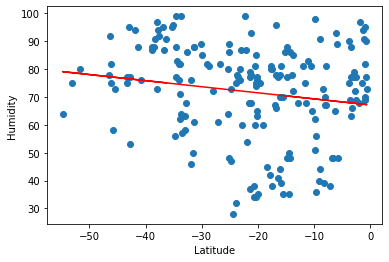

In [20]:
x_values = southernHem['Latitude']
y_values = southernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0011213529944105525


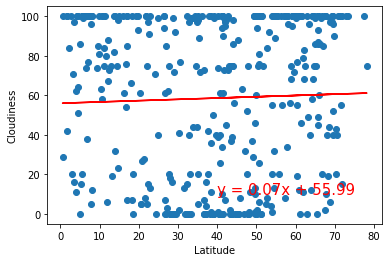

In [21]:
x_values = northernHem['Latitude']
y_values = northernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.003243571684387264


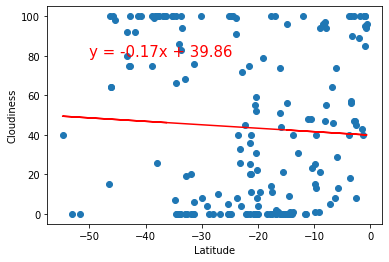

In [22]:
x_values = southernHem['Latitude']
y_values = southernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0006549207371159563


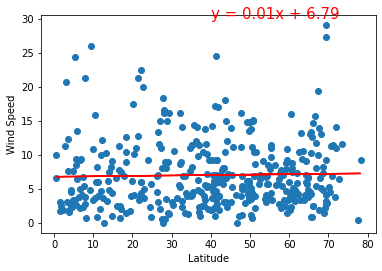

In [23]:
x_values = northernHem['Latitude']
y_values = northernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.022274207173638788


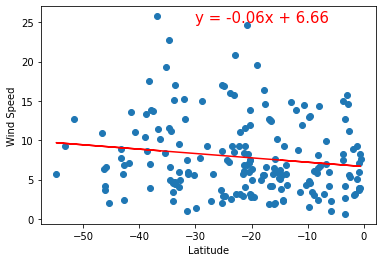

In [24]:
x_values = southernHem['Latitude']
y_values = southernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.show()